# Fake News Exploratory Data Analysis

Get subset of FakeNewCorpus data set.

In [18]:
import pandas as pd
import regex as re
import preprocessing_functions
import cleaning_functions

# Import 250 articles as pandas df
raw_data = pd.read_csv('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv', dtype={"content": "string"}, index_col=0) 
raw_data.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


### Cleaning and preprocessing

Perform basic cleaning: remove urls, dates, numbers, emails.

In [19]:
data250 = raw_data.copy(deep = True) #

In [20]:
cleaning_functions.clean_dataframe(data250)
data250['content'].head()

cleaning took 1.2768051624298096 seconds


0    sometimes the power of christmas will make you...
1    awakening of num strands of dna reconnecting w...
2    never hike alone a friday the num fan film usa...
3    when a rare shark was caught scientists were l...
4    donald trump has the unnerving ability to abil...
Name: content, dtype: object

In [21]:
preprocessing_functions.preprocess(data250)
data250['content']

Tokenizing took 0.2754659652709961 seconds
Removing stopwords took 0.0006577968597412109 seconds
Stemming took 0.00014328956604003906 seconds
Converting to list took 0.9327890872955322 seconds


0      [sometim, power, christma, make, wild, wonder,...
1      [awaken, num, strand, dna, reconnect, movi, re...
2      [never, hike, alon, friday, num, fan, film, us...
3      [rare, shark, caught, scientist, left, blunder...
4      [donald, trump, unnerv, abil, abil, creat, rea...
                             ...                        
245    [prison, rahm, god, work, mani, other, headlin...
246    [num, use, item, tini, home, headlin, bitcoin,...
247    [former, cia, director, michael, hayden, said,...
248    [antonio, sabato, jr, say, hollywood, liber, e...
249    [former, url, presid, bill, clinton, monday, c...
Name: content, Length: 250, dtype: object

Next, we define functions that can visualize our dataset

### Visualization of data set

In [22]:
import numpy as np
import matplotlib.pyplot as plt

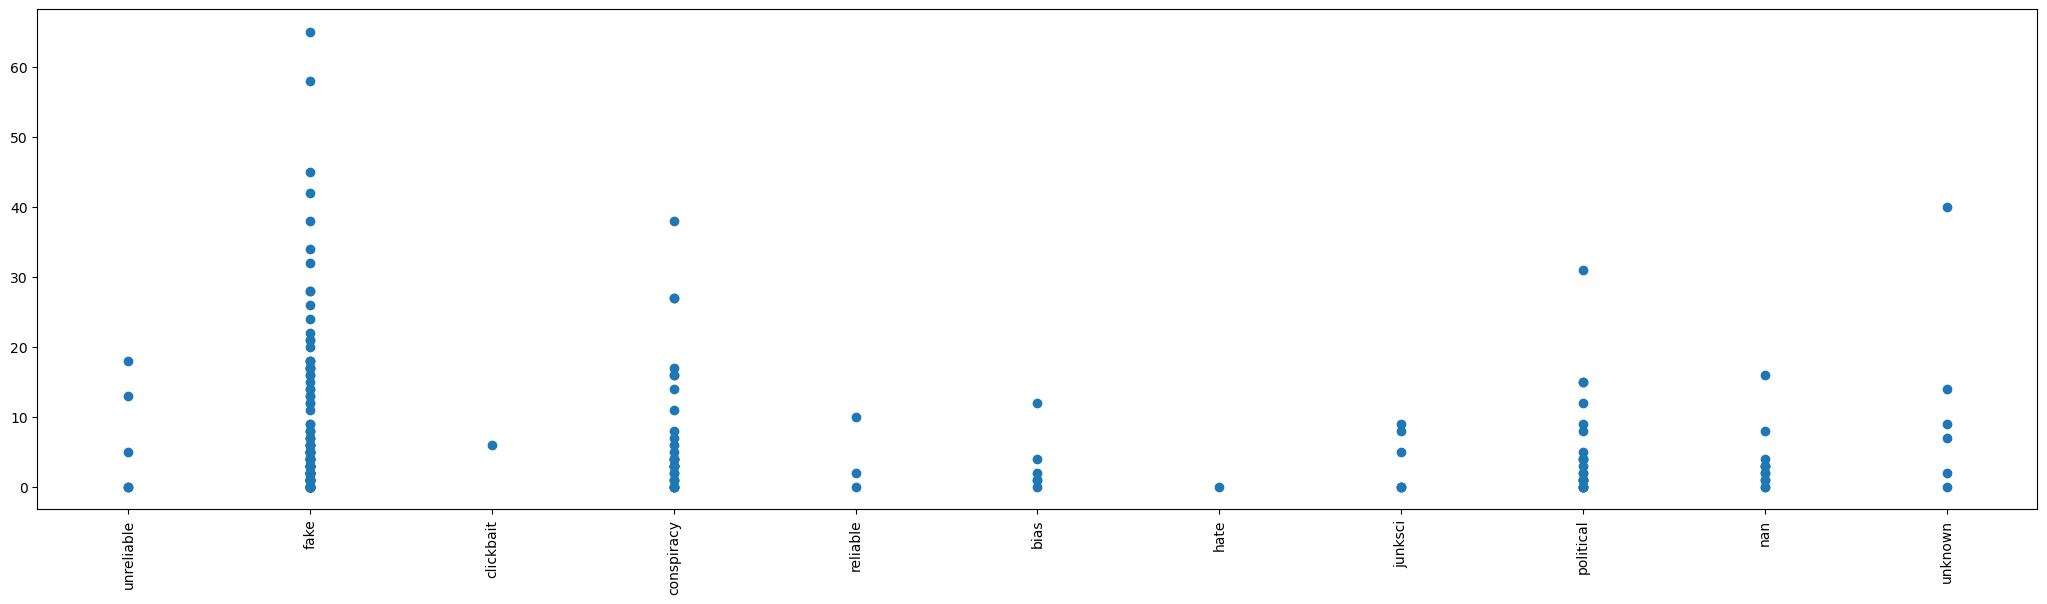

In [23]:
from plotting_functions import pair_keyword_type, scatterplot_keyword_type
scatterplot_keyword_type("num", data250)

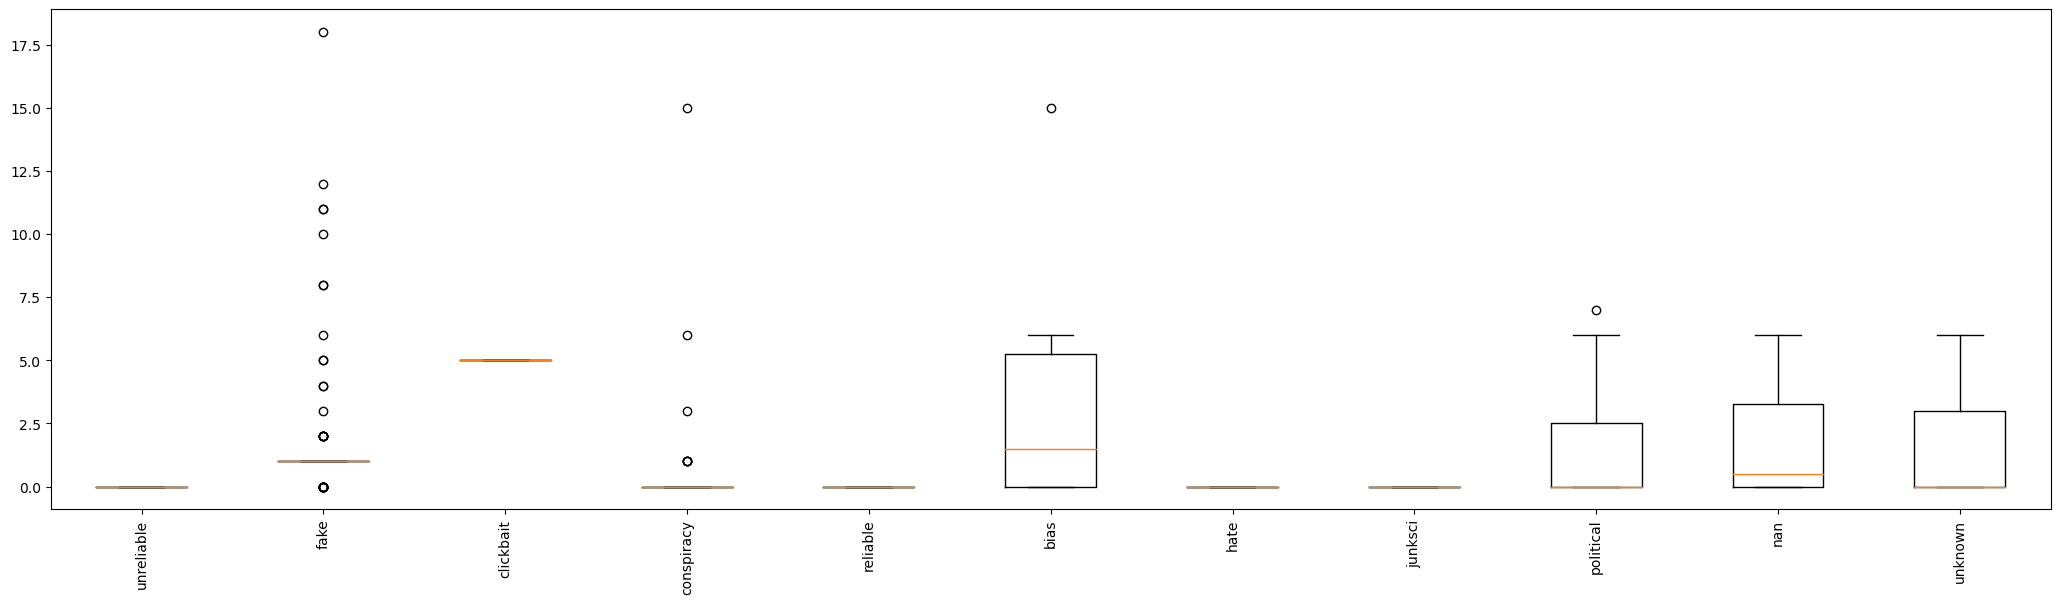

In [24]:
from plotting_functions import boxplot_keyword_type
boxplot_keyword_type('trump', data250)

[2.5, 2.0, 6.0, 4.0, 2.0, 1.5, 0.0, 2.5, 2.0, 2.5, 8.0]
[6.0, 6.567741935483871, 6.0, 7.419354838709677, 4.0, 3.3333333333333335, 0.0, 3.6666666666666665, 5.173913043478261, 3.5833333333333335, 12.0]
['unreliable', 'fake', 'clickbait', 'conspiracy', 'reliable', 'bias', 'hate', 'junksci', 'political', 'nan', 'unknown']


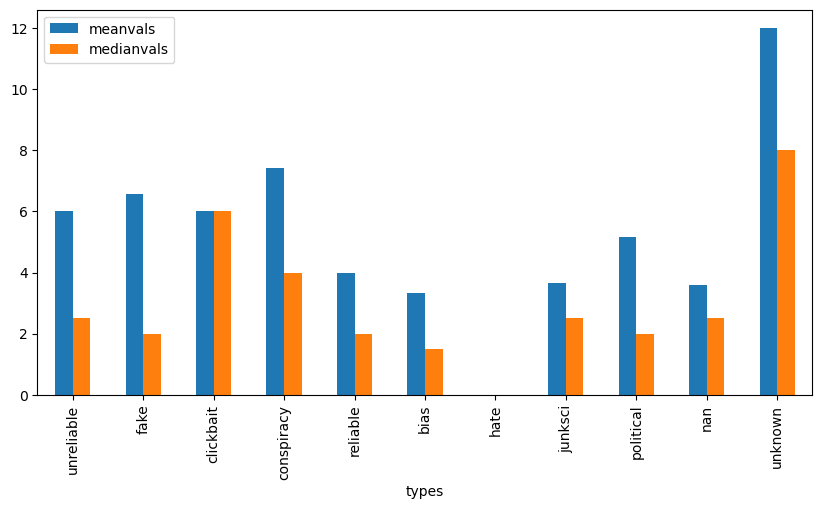

In [25]:
from plotting_functions import barplot_keyword_type
barplot_keyword_type('num', data250) 